In [46]:
import csv

def extract_first_names(csv_file_path, txt_file_path):
    with open(csv_file_path, newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file)
        with open(txt_file_path, 'w', encoding='utf-8') as txt_file:
            next(csv_reader)  # Skip the header row
            for row in csv_reader:
                if len(row) > 0 and row[0]:  # Check if the row is not empty and contains data
                    first_name = row[0].split()[0]  # Extract first name from the full name
                    txt_file.write(first_name + '\n')

# Example usage
csv_file_path = 'Indian-Male-Names.csv'
txt_file_path = 'first_names.txt'
extract_first_names(csv_file_path, txt_file_path)


In [47]:
# Read the first_names.txt file with explicit UTF-8 encoding
with open('first_names.txt', 'r', encoding='utf-8') as file:
    words = file.read().splitlines()

print(words)


['barjraj', 'ramdin', 'sharat', 'birender', 'amit', 'kushal', 'kasid', 'shiv', 'vikram', 'sanjay', 'abhi', 'ram', 'khadak', 'gurmit', 'chanderpal', 'aman', 'khursid', 'rajeev', 'durgesh', 'nahar', 'ram', 'sunder', 'maansingh', 'rohit', 'rohit', 'sparsh', 'santosh', 'santosh', 'punit', 'dinesh', 'gulshan', 'arvind', 'nausad', 'gurmit', 'md.', 'shiv', 'moti', 'kausal', 'rohit', 'rohit', 'mohabbat', 'raj', 'jaswant', 'sevak', 'chotelal', 'amit', 'rupesh', 'midda', 'dharam', 'manoj', 'ram', 'preetam', 'ram', 'sarain', 'pankaj', 'sheak', 'riyasat', 'vinit', 'sumit', 'arindra', 'kali', 'badshya', 'vikash', 'devinder', 'aman', 'mohan', 'hemant', 'shivam', 'yash', 'aakash', 'chandesh', 'sumit', 'supriyal', 'gajender', 'pooran', 'irfan', 'azaruddin', 'mukul', 'pooran', 'manoj', 'sanjay', 'raja', 'pawan', 'sandeep', 'rajkumar', 'parvesh', 'mohd', 'neeraj', 'jamil', 'yogita', 'rijul', 'mohd', 'rahul', 'rajender', 'suraj', 'rizwan', 'sandeep', 'md', 'har', 'deepak', 'rahul', 'abhishekh', 'shelende

In [48]:
words[:10]

['barjraj',
 'ramdin',
 'sharat',
 'birender',
 'amit',
 'kushal',
 'kasid',
 'shiv',
 'vikram',
 'sanjay']

In [49]:
len(words)

14821

In [50]:
import re

def remove_non_alphabetic_words_and_special_characters(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        words = file.read().splitlines()

    # Filter out words containing non-alphabetic characters or special characters, and remove words in Hindi
    filtered_words = [re.sub(r'[^a-zA-Z]', '', word) for word in words if re.match(r'^[a-zA-Z\s]+$', word)]

    # Remove any empty strings resulting from removing characters
    filtered_words = [word for word in filtered_words if word]

    # Write the filtered words to the output file
    with open(output_file, 'w', encoding='utf-8') as file:
        for word in filtered_words:
            file.write(word + '\n')

# Example usage
input_file = 'first_names.txt'
output_file = 'clean_first_names.txt'
remove_non_alphabetic_words_and_special_characters(input_file, output_file)


In [51]:
with open('clean_first_names.txt', 'r', encoding='utf-8') as file:
    words = file.read().splitlines()

print(words)

['barjraj', 'ramdin', 'sharat', 'birender', 'amit', 'kushal', 'kasid', 'shiv', 'vikram', 'sanjay', 'abhi', 'ram', 'khadak', 'gurmit', 'chanderpal', 'aman', 'khursid', 'rajeev', 'durgesh', 'nahar', 'ram', 'sunder', 'maansingh', 'rohit', 'rohit', 'sparsh', 'santosh', 'santosh', 'punit', 'dinesh', 'gulshan', 'arvind', 'nausad', 'gurmit', 'shiv', 'moti', 'kausal', 'rohit', 'rohit', 'mohabbat', 'raj', 'jaswant', 'sevak', 'chotelal', 'amit', 'rupesh', 'midda', 'dharam', 'manoj', 'ram', 'preetam', 'ram', 'sarain', 'pankaj', 'sheak', 'riyasat', 'vinit', 'sumit', 'arindra', 'kali', 'badshya', 'vikash', 'devinder', 'aman', 'mohan', 'hemant', 'shivam', 'yash', 'aakash', 'chandesh', 'sumit', 'supriyal', 'gajender', 'pooran', 'irfan', 'azaruddin', 'mukul', 'pooran', 'manoj', 'sanjay', 'raja', 'pawan', 'sandeep', 'rajkumar', 'parvesh', 'mohd', 'neeraj', 'jamil', 'yogita', 'rijul', 'mohd', 'rahul', 'rajender', 'suraj', 'rizwan', 'sandeep', 'md', 'har', 'deepak', 'rahul', 'abhishekh', 'shelender', 'sa

In [52]:
len(words)

14486

In [53]:
min(len(w) for w in words)

1

In [54]:
max((len(w),ix) for ix,w in enumerate(words))



(19, 6240)

In [55]:
words[6240]

'lllllllllllllllllll'

In [56]:
b ={}
for w in words:
    chs = ['<S>'] + list(w)+ ['<E>']
    for ch1 , ch2 , in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram,0)+1
        

In [57]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('s', 'h'), 3422),
 (('a', 'n'), 3303),
 (('r', 'a'), 3041),
 (('<S>', 's'), 2587),
 (('h', '<E>'), 1971),
 (('<S>', 'r'), 1930),
 (('h', 'a'), 1878),
 (('<S>', 'a'), 1853),
 (('a', 'r'), 1734),
 (('n', '<E>'), 1697),
 (('r', '<E>'), 1551),
 (('a', 'm'), 1531),
 (('d', 'e'), 1366),
 (('l', '<E>'), 1326),
 (('<S>', 'm'), 1322),
 (('e', 'e'), 1284),
 (('n', 'd'), 1275),
 (('a', 'j'), 1195),
 (('s', 'a'), 1168),
 (('m', 'a'), 1159),
 (('t', '<E>'), 1104),
 (('v', 'i'), 1049),
 (('e', 's'), 1040),
 (('e', 'r'), 967),
 (('h', 'i'), 957),
 (('m', '<E>'), 938),
 (('a', 'l'), 909),
 (('i', 'n'), 884),
 (('i', 't'), 883),
 (('a', 's'), 879),
 (('j', 'a'), 872),
 (('p', 'a'), 851),
 (('i', 's'), 847),
 (('<S>', 'p'), 816),
 (('<S>', 'v'), 807),
 (('u', '<E>'), 793),
 (('<S>', 'd'), 791),
 (('d', '<E>'), 783),
 (('k', 'a'), 780),
 (('e', 'n'), 775),
 (('s', 'u'), 763),
 (('n', 'a'), 712),
 (('a', 'k'), 696),
 (('a', '<E>'), 695),
 (('<S>', 'k'), 678),
 (('i', '<E>'), 647),
 (('n', 'i'), 643),
 

In [58]:
import torch 

In [59]:
N = torch.zeros((27,27), dtype=torch.int32)


In [60]:
sorted(list(set(''.join(words))))

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [61]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [62]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 , in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
        
N      

tensor([[   0, 1853,  617,  230,  791,   12,   85,  424,  356,  153,  471,  678,
          234, 1322,  601,   86,  816,    0, 1930, 2587,  194,   90,  807,   27,
            0,  103,   19],
        [ 695,  167,  415,   83,  402,   10,   65,  211,  536,  231, 1195,  696,
          909, 1531, 3303,    1,   96,   10, 1734,  879,  503,  154,  520,  141,
           45,  595,   75],
        [ 116,  320,   20,    1,   44,   34,    0,    0,  498,  218,    5,    0,
           31,    0,    0,   31,    1,    0,   48,    0,    0,   87,    0,    0,
            0,   10,    0],
        [   1,    1,    0,    6,    0,   16,    0,    0,  399,    0,    0,   46,
            0,    0,    0,    2,    0,    0,    0,    0,    5,    1,    0,    0,
            0,    0,    0],
        [ 783,  279,    1,    0,   96, 1366,    0,    0,  335,  335,    0,    2,
            0,    3,    4,   12,    3,    0,  204,    3,    1,  124,    1,    3,
            0,    9,    0],
        [ 101,    2,    8,    1,   62, 1284,    3,

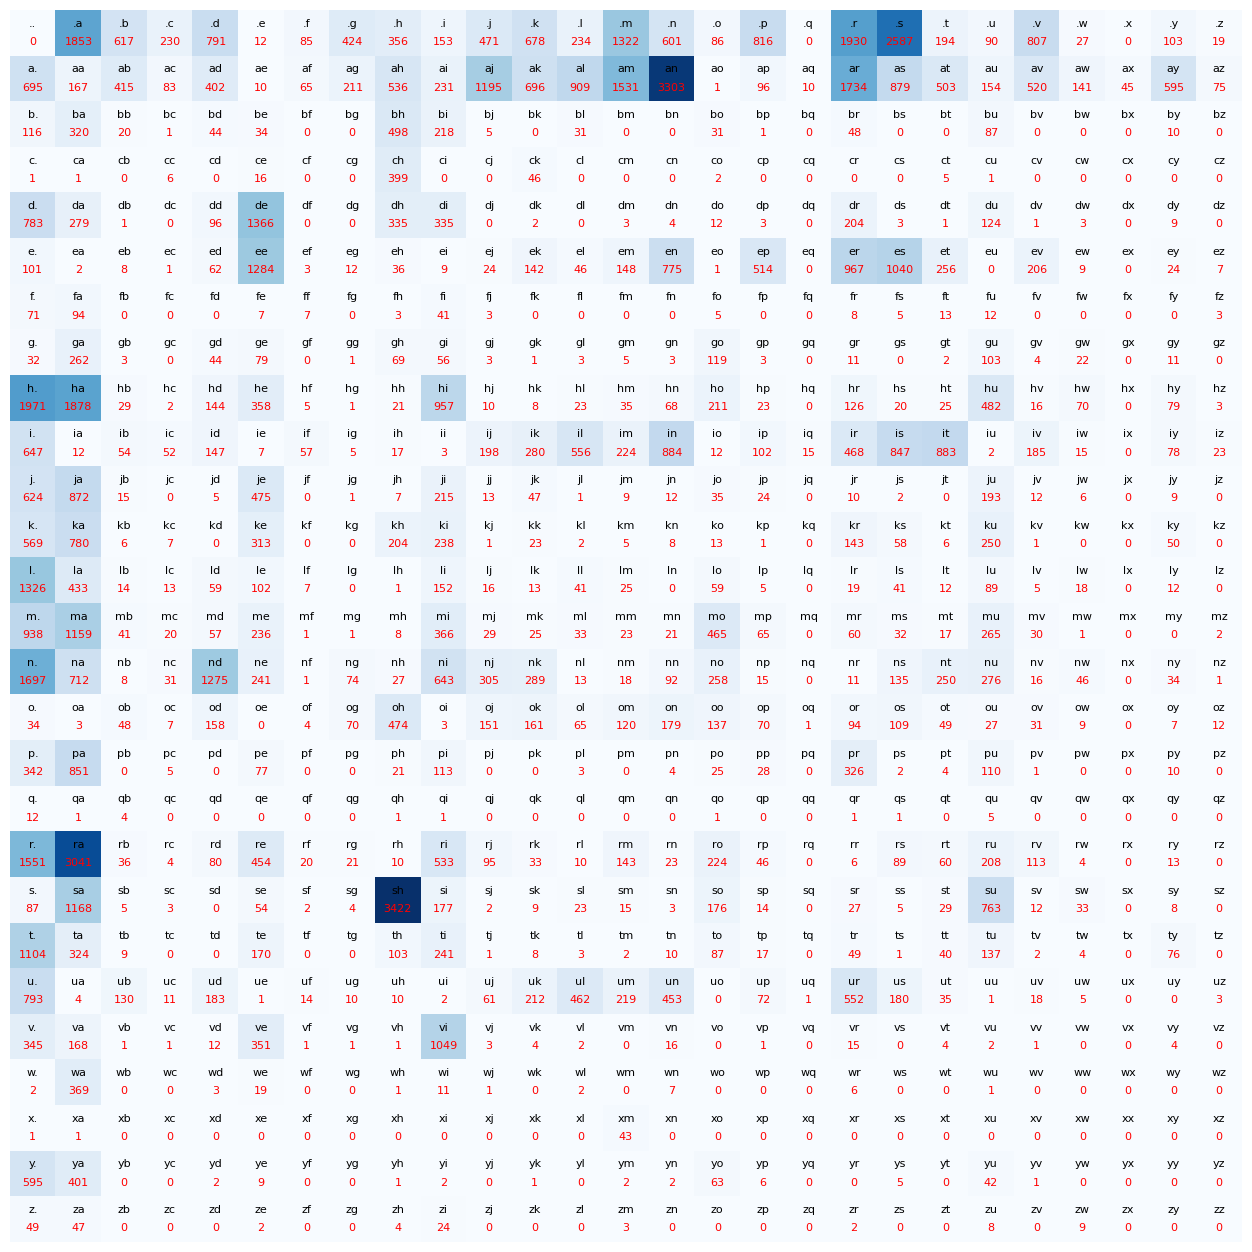

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i - 0.2, chstr, ha='center', va='center', fontsize=8, color='black')  # Adjusted position
        plt.text(j, i + 0.2, str(N[i, j].item()), ha='center', va='center', fontsize=8, color='red')  # Adjusted position

plt.axis('off')
plt.show()


In [64]:
N[0]

tensor([   0, 1853,  617,  230,  791,   12,   85,  424,  356,  153,  471,  678,
         234, 1322,  601,   86,  816,    0, 1930, 2587,  194,   90,  807,   27,
           0,  103,   19], dtype=torch.int32)

In [65]:
P = (N+1).float()
P /= P.sum(dim=1,keepdims=True)
P.shape


torch.Size([27, 27])

In [66]:
ix = 0
out = []
s = ''
for i in range(10):
    while True:
        p = P[ix]
        #p = N[ix].float()/N[ix].sum()
        
        ix = torch.multinomial(p,num_samples=1,replacement=True).item()
        s = s+itos[ix]
        
        if ix ==0:
            out.append(s)
            s = ''
            break
out

['ash.',
 'v.',
 'a.',
 'aniditaven.',
 'a.',
 'r.',
 'a.',
 'nanoy.',
 'shep.',
 'jinjish.']

In [67]:
log_likely = 0.0
n=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 , in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix,ix2]
        n +=1
        log_likely += torch.log(prob)
        #print(F"{ch1}{ch2}:  {prob:.3f}   {log_likely : .3f}")

print(f'{log_likely = }')
nll = -log_likely
print(f'{nll = }')
print(nll/n)

log_likely = tensor(-422453.4375)
nll = tensor(422453.4375)
tensor(4.2765)


Neural Network approach

In [68]:
import torch.nn.functional as F

In [81]:
xs ,ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 , in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("num of example : ",num)

w = torch.randn((27,27) , requires_grad=True)


num of example :  98785


In [112]:
for k in range(100):

    xenc  = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ w
    counts = logits.exp()
    probs = counts/counts.sum(1 , keepdim=True)

    loss = -probs[torch.arange(num),ys].log().mean() + 0.01*(w*w).mean()
    

    w.grad = None
    loss.backward()

    w.data += -50*w.grad

    if k% 5 ==0:
        print(f"loss is {loss.item()}")

        

loss is 2.4897773265838623
loss is 2.3415513038635254
loss is 2.29369854927063
loss is 2.268954277038574
loss is 2.254042148590088
loss is 2.2441980838775635
loss is 2.237271308898926
loss is 2.232161283493042
loss is 2.2282536029815674
loss is 2.22517991065979
loss is 2.2227067947387695
loss is 2.220679998397827
loss is 2.218993663787842
loss is 2.2175726890563965
loss is 2.216362476348877
loss is 2.2153217792510986
loss is 2.2144198417663574
loss is 2.213632822036743
loss is 2.2129416465759277
loss is 2.212331771850586


In [126]:
ix = 0
out = []
s = ''
for i in range(10):
    while True:
        #p = P[ix]
        xenc  = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = xenc @ w
        counts = logits.exp()

        p = counts / counts.sum(1, keepdim=True)


        
        
        ix = torch.multinomial(p,num_samples=1,replacement=True).item()
        s = s+itos[ix]
        
        if ix ==0:
            out.append(s)
            s = ''
            break
out

['l.',
 'shmanan.',
 'hiwanijshashr.',
 'rantn.',
 'arepankrarishil.',
 'shalulanich.',
 'r.',
 'reten.',
 'drand.',
 'brashan.']